# Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

# Training Data

In [ ]:
# Reading the Training Data
df = pd.read_csv("/kaggle/input/stroke-prediction-by-123-of-ai-dec-2023/stroke_train_set.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,47.0,0,0,Yes,Private,Urban,63.98,26.8,smokes,0
1,Male,54.0,0,0,Yes,Private,Urban,86.26,35.1,formerly smoked,0
2,Female,3.0,0,0,No,children,Rural,68.34,18.0,Unknown,0
3,Female,62.0,0,0,Yes,Private,Rural,226.38,47.4,never smoked,0
4,Female,27.0,0,0,Yes,Private,Rural,85.60,21.4,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4083,Male,79.0,0,0,Yes,Private,Rural,69.34,29.0,never smoked,0
4084,Male,55.0,0,0,Yes,Self-employed,Rural,163.82,27.5,never smoked,0
4085,Male,33.0,0,0,Yes,Private,Urban,105.19,50.1,smokes,0
4086,Male,34.0,0,0,Yes,Private,Urban,85.57,26.8,Unknown,0


In [ ]:
df.shape[0]

4088

In [ ]:
df['gender'].value_counts()

gender
Female    2396
Male      1691
Other        1
Name: count, dtype: int64

In [ ]:
df['ever_married'].value_counts()

ever_married
Yes    2672
No     1416
Name: count, dtype: int64

In [ ]:
df['work_type'].value_counts()

work_type
Private          2332
Self-employed     666
children          548
Govt_job          528
Never_worked       14
Name: count, dtype: int64

In [ ]:
df['Residence_type'].value_counts()

Residence_type
Urban    2096
Rural    1992
Name: count, dtype: int64

In [ ]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1517
Unknown            1239
formerly smoked     698
smokes              634
Name: count, dtype: int64

In [ ]:
# Check for NULL values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  162
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Pre-processing: Address missing (NULL) values - fill with mean
values = {'bmi' : df['bmi'].mean()}
df1 = df.fillna(value=values)
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,47.0,0,0,Yes,Private,Urban,63.98,26.8,smokes,0
1,Male,54.0,0,0,Yes,Private,Urban,86.26,35.1,formerly smoked,0
2,Female,3.0,0,0,No,children,Rural,68.34,18.0,Unknown,0
3,Female,62.0,0,0,Yes,Private,Rural,226.38,47.4,never smoked,0
4,Female,27.0,0,0,Yes,Private,Rural,85.60,21.4,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4083,Male,79.0,0,0,Yes,Private,Rural,69.34,29.0,never smoked,0
4084,Male,55.0,0,0,Yes,Self-employed,Rural,163.82,27.5,never smoked,0
4085,Male,33.0,0,0,Yes,Private,Urban,105.19,50.1,smokes,0
4086,Male,34.0,0,0,Yes,Private,Urban,85.57,26.8,Unknown,0


In [ ]:
df1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Pre-processing: Remove Duplicate Rows
df1 = pd.DataFrame(df1)

# Check for exactly duplicate rows and count them
duplicate_count = df1.duplicated().sum()

print(f"Number of exactly duplicate rows: {duplicate_count}")

Number of exactly duplicate rows: 0


In [ ]:
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,47.0,0,0,Yes,Private,Urban,63.98,26.8,smokes,0
1,Male,54.0,0,0,Yes,Private,Urban,86.26,35.1,formerly smoked,0
2,Female,3.0,0,0,No,children,Rural,68.34,18.0,Unknown,0
3,Female,62.0,0,0,Yes,Private,Rural,226.38,47.4,never smoked,0
4,Female,27.0,0,0,Yes,Private,Rural,85.60,21.4,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4083,Male,79.0,0,0,Yes,Private,Rural,69.34,29.0,never smoked,0
4084,Male,55.0,0,0,Yes,Self-employed,Rural,163.82,27.5,never smoked,0
4085,Male,33.0,0,0,Yes,Private,Urban,105.19,50.1,smokes,0
4086,Male,34.0,0,0,Yes,Private,Urban,85.57,26.8,Unknown,0


In [ ]:
# Pre-processing (Encoding): Convert categorical values to numeric
# Use df['col_name'].value_counts() to find out all the categories available per column
df2 = pd.get_dummies(data = df1)
df2

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,47.0,0,0,63.98,26.8,0,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
1,54.0,0,0,86.26,35.1,0,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
2,3.0,0,0,68.34,18.0,0,True,False,False,True,...,False,False,False,True,True,False,True,False,False,False
3,62.0,0,0,226.38,47.4,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
4,27.0,0,0,85.60,21.4,0,True,False,False,False,...,False,True,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,79.0,0,0,69.34,29.0,0,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
4084,55.0,0,0,163.82,27.5,0,False,True,False,False,...,False,False,True,False,True,False,False,False,True,False
4085,33.0,0,0,105.19,50.1,0,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
4086,34.0,0,0,85.57,26.8,0,False,True,False,False,...,False,True,False,False,False,True,True,False,False,False


In [ ]:
columns_to_drop = ['Residence_type_Rural','Residence_type_Urban','gender_Other', 'gender_Male', 'gender_Female','ever_married_No']
df3 = df2.drop(columns=columns_to_drop)
df3

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,47.0,0,0,63.98,26.8,0,True,False,False,True,False,False,False,False,False,True
1,54.0,0,0,86.26,35.1,0,True,False,False,True,False,False,False,True,False,False
2,3.0,0,0,68.34,18.0,0,False,False,False,False,False,True,True,False,False,False
3,62.0,0,0,226.38,47.4,0,True,False,False,True,False,False,False,False,True,False
4,27.0,0,0,85.60,21.4,0,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,79.0,0,0,69.34,29.0,0,True,False,False,True,False,False,False,False,True,False
4084,55.0,0,0,163.82,27.5,0,True,False,False,False,True,False,False,False,True,False
4085,33.0,0,0,105.19,50.1,0,True,False,False,True,False,False,False,False,False,True
4086,34.0,0,0,85.57,26.8,0,True,False,False,True,False,False,True,False,False,False


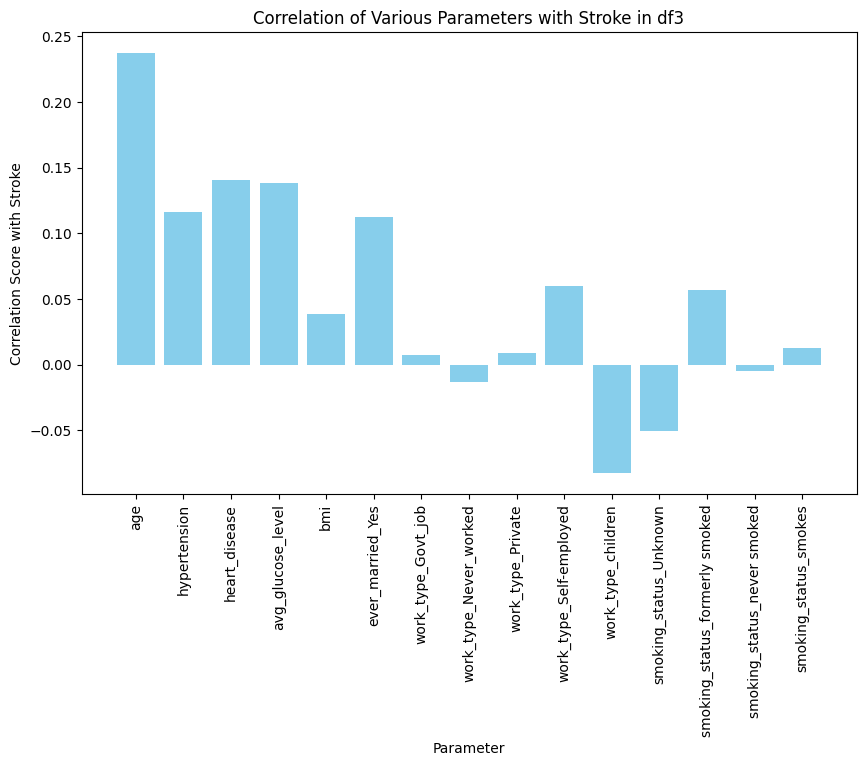

In [ ]:
# Data Visualization

parameters = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
              'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
              'work_type_Private', 'work_type_Self-employed', 'work_type_children',
              'smoking_status_Unknown', 'smoking_status_formerly smoked',
              'smoking_status_never smoked', 'smoking_status_smokes']

# List to collect correlation scores
correlation_data = []

for param in parameters:
    corr_score = df3['stroke'].corr(df3[param])
    correlation_data.append((param, corr_score))

# Create the DataFrame from the list of tuples
correlation_scores = pd.DataFrame(correlation_data, columns=['Parameter', 'Correlation_Score'])

# Plotting the correlation scores
plt.figure(figsize=(10, 6))
plt.bar(correlation_scores['Parameter'], correlation_scores['Correlation_Score'], color='skyblue')
plt.xlabel('Parameter')
plt.ylabel('Correlation Score with Stroke')
plt.xticks(rotation=90)
plt.title('Correlation of Various Parameters with Stroke')
plt.show()

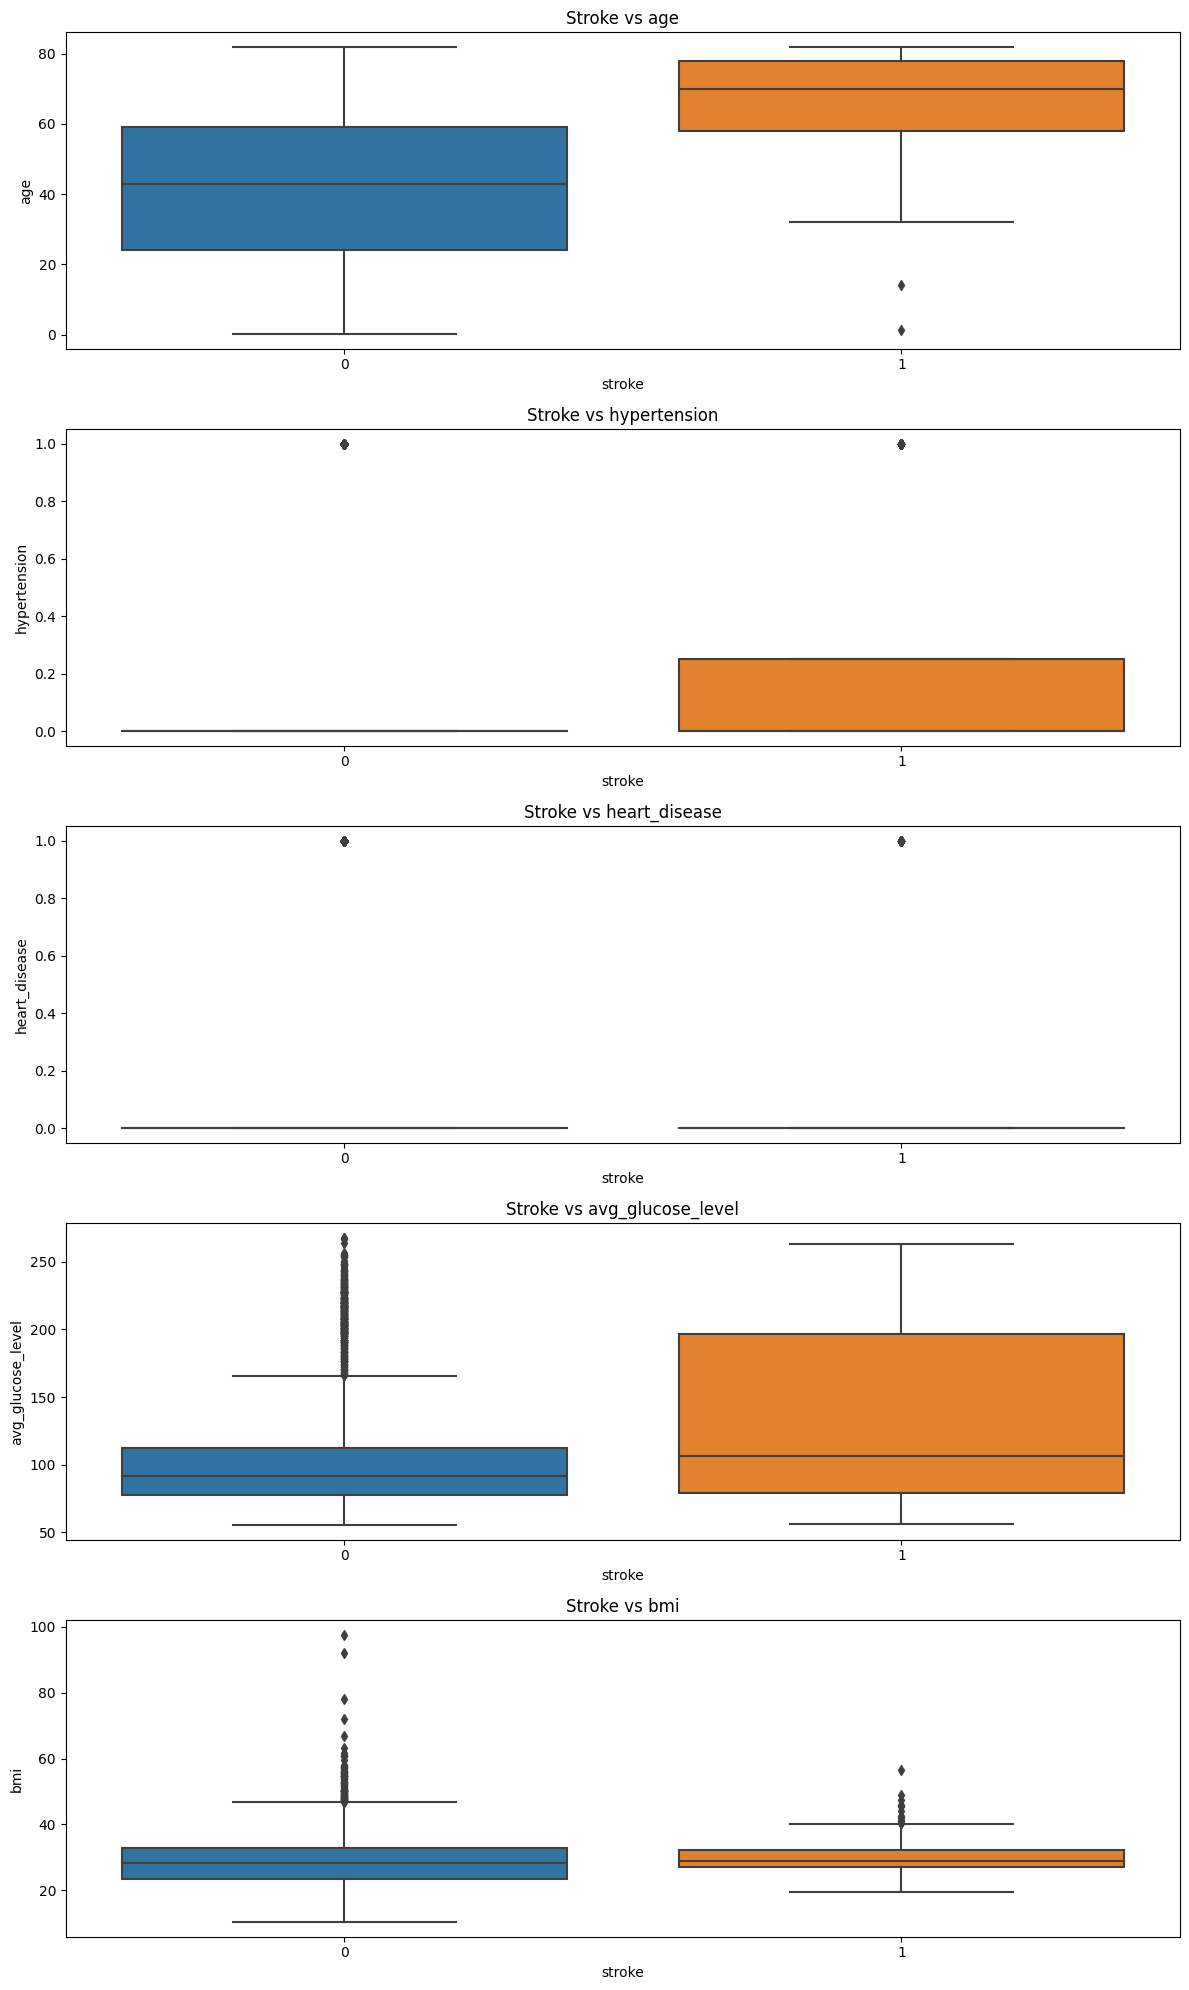

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns for correlation
numerical_cols = df3.select_dtypes(include=['float64', 'int64']).columns.drop('stroke')

# Set up the matplotlib figure
plt.figure(figsize=(12, len(numerical_cols) * 4))

# Iterate over each numerical parameter and create a boxplot
for i, param in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.boxplot(x='stroke', y=param, data=df3)
    plt.title(f'Stroke vs {param}')
    plt.tight_layout()

plt.show()

<Axes: >

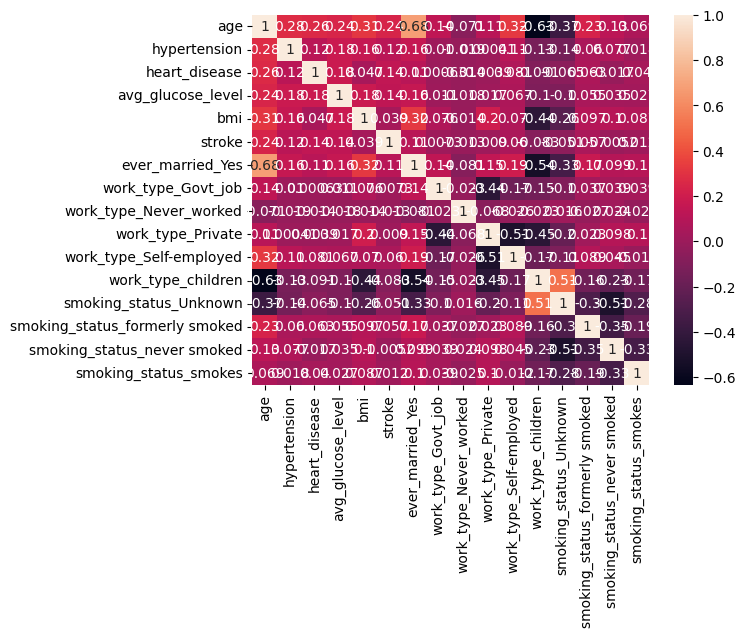

In [ ]:
import seaborn as sns
corr_matrix = df3.corr()
sns.heatmap(corr_matrix, annot=True)

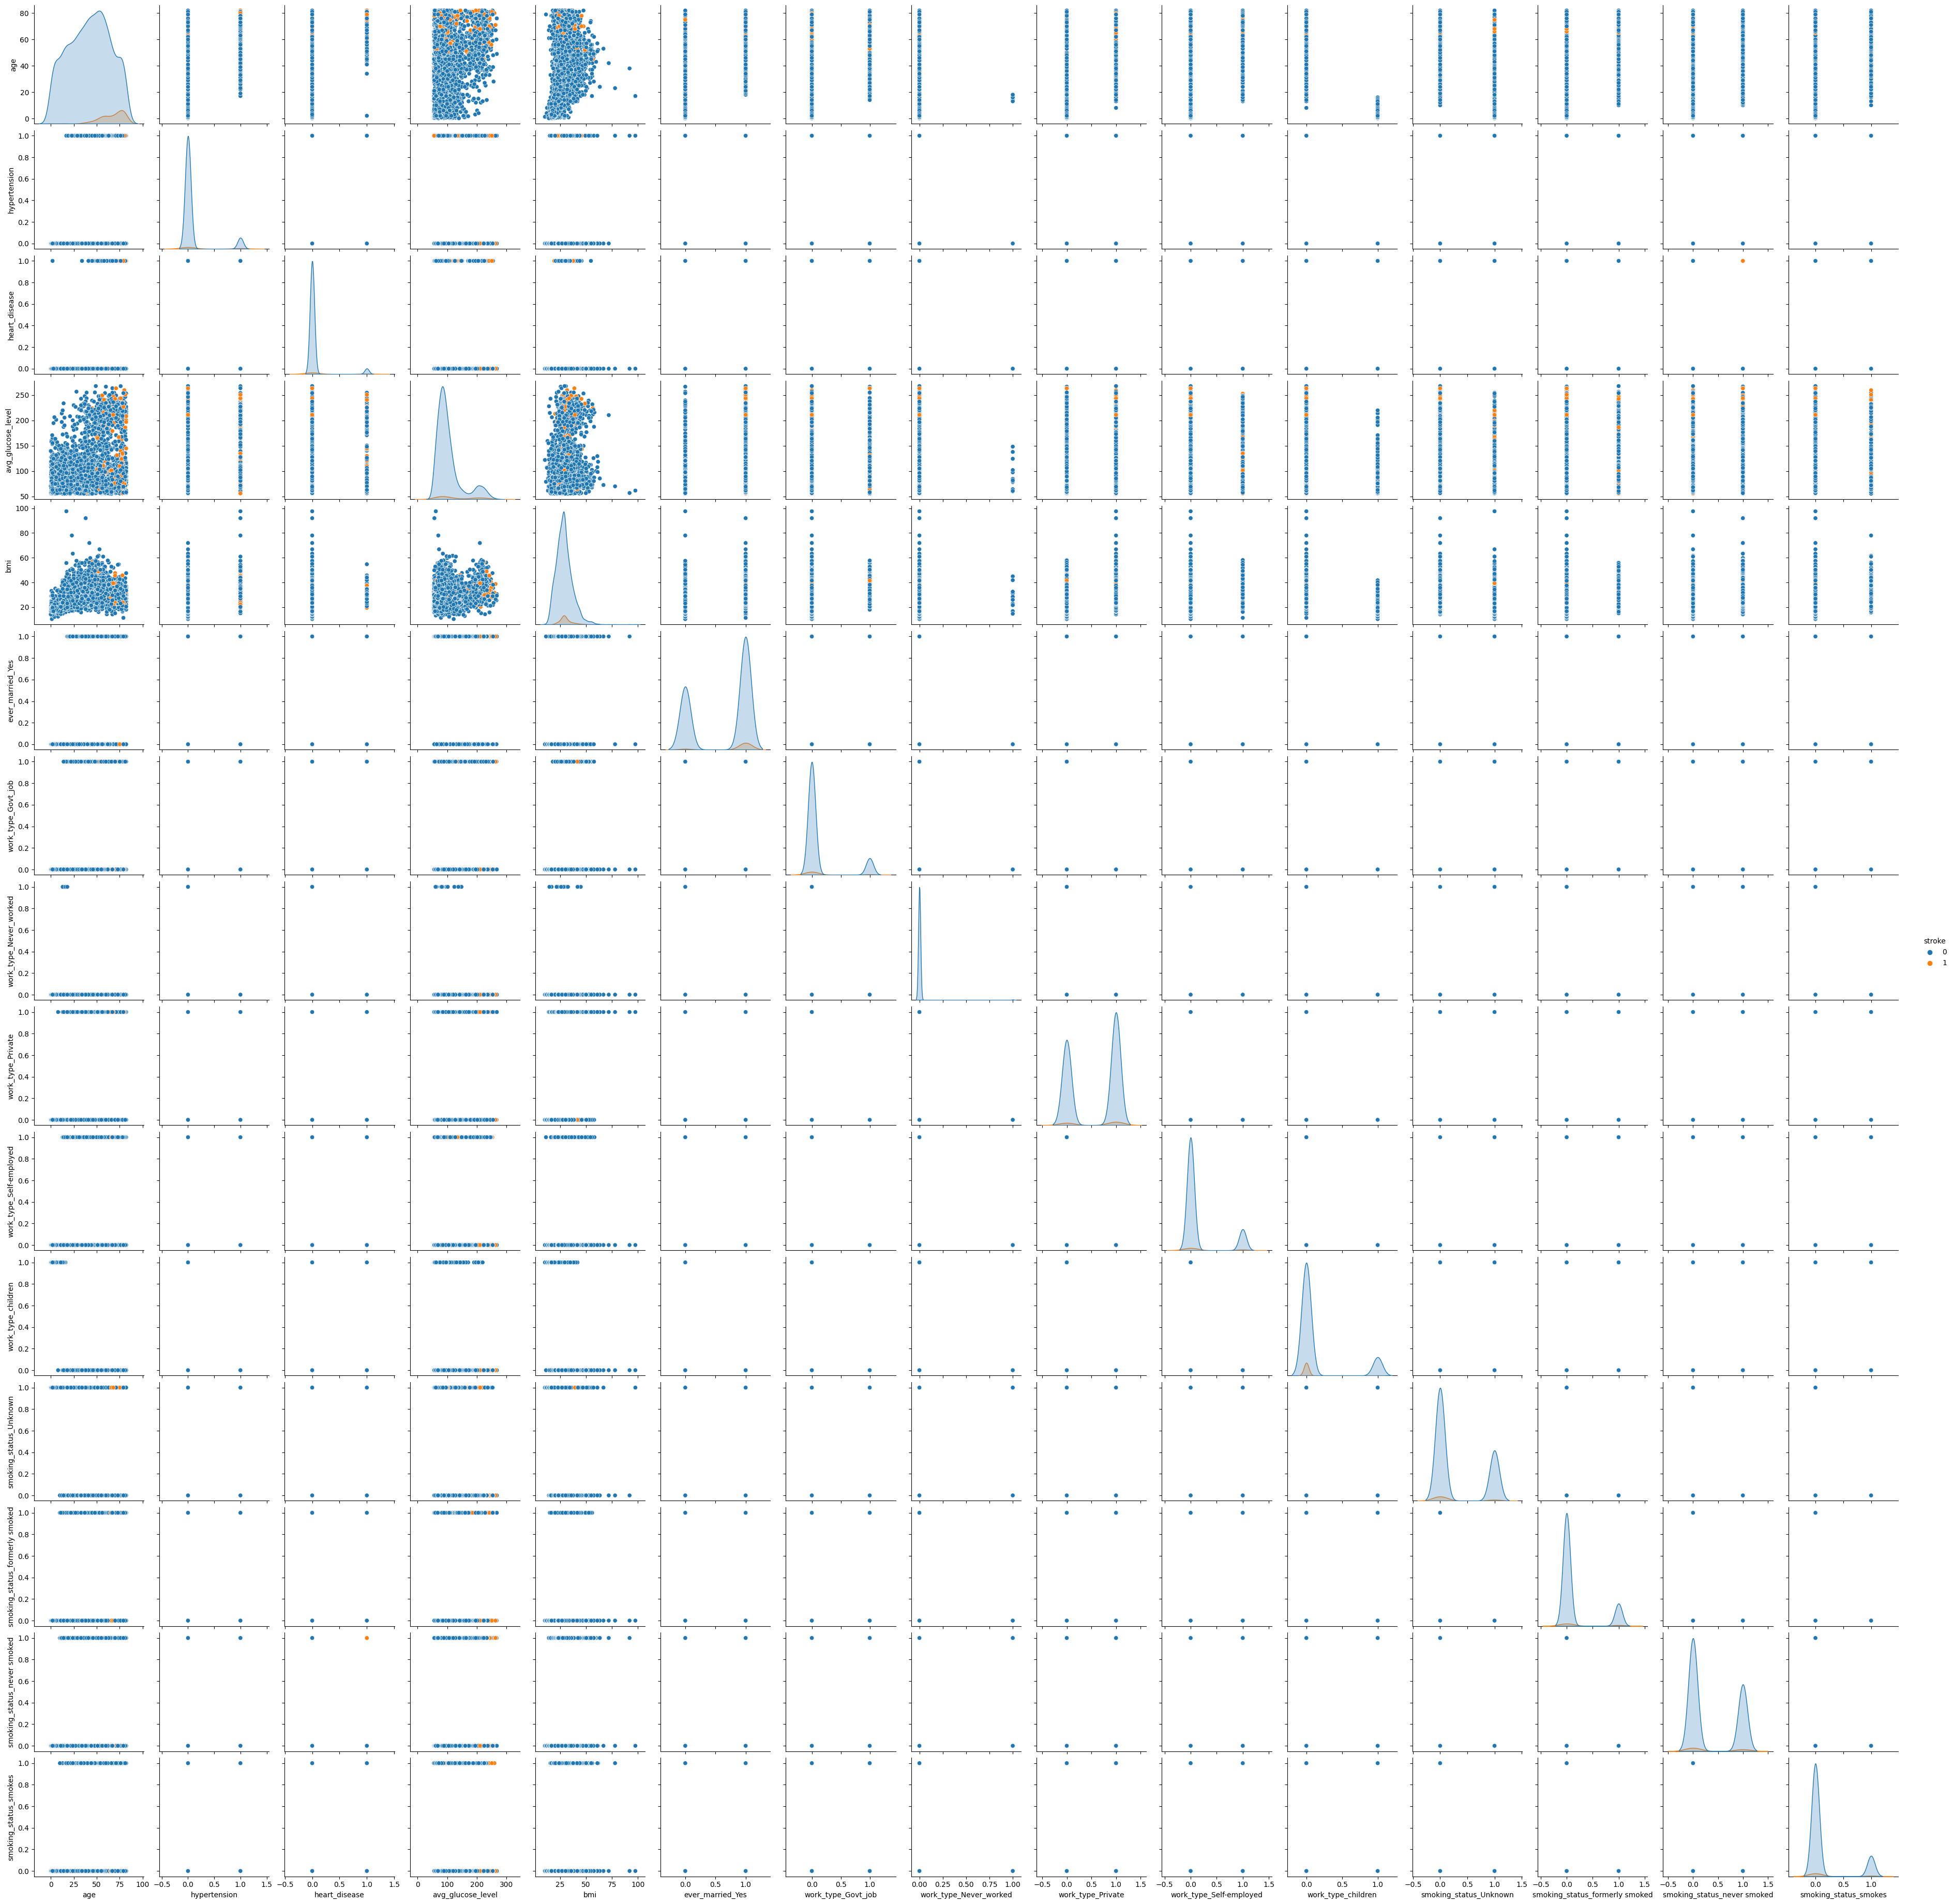

In [ ]:
sns.pairplot(df3, hue='stroke')

<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

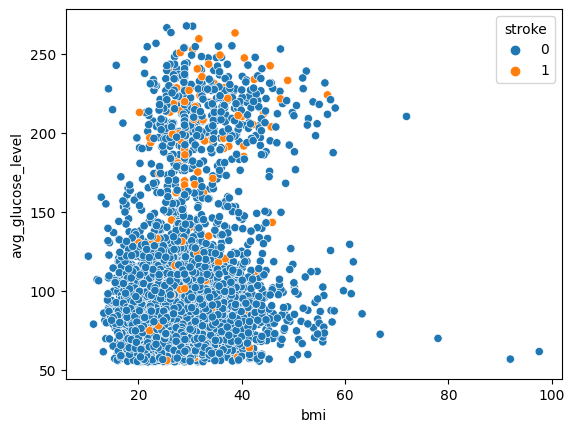

In [ ]:
sns.scatterplot(x='bmi', y='avg_glucose_level', hue='stroke', data=df3)

<Axes: xlabel='heart_disease', ylabel='hypertension'>

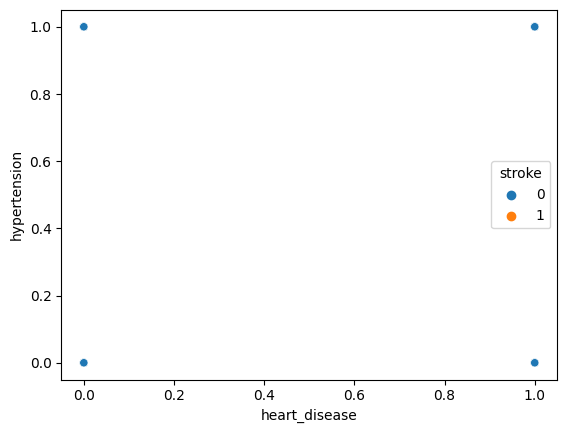

In [ ]:
sns.scatterplot(x='heart_disease', y='hypertension', hue='stroke', data=df3)

# Models

In [ ]:
# Logistic Regression Method

# Separate the features (X) and the target (y)
X = df3.drop('stroke', axis=1)
y = df3['stroke']

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_processed, y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,zero_division='warn')

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7679948586118251
Confusion Matrix:
[[587 189]
 [172 608]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       776
           1       0.76      0.78      0.77       780

    accuracy                           0.77      1556
   macro avg       0.77      0.77      0.77      1556
weighted avg       0.77      0.77      0.77      1556



In [ ]:
# Decision Tree Method

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# df = pd.read_csv('your_dataset.csv')

# Splitting the data into features and target
X = df3.drop('stroke', axis=1)  # assuming 'stroke' is the target variable
y = df3['stroke']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Handle class imbalance
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_processed, y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Classifier:
Accuracy: 0.8862467866323908
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       776
           1       0.88      0.89      0.89       780

    accuracy                           0.89      1556
   macro avg       0.89      0.89      0.89      1556
weighted avg       0.89      0.89      0.89      1556



In [ ]:
# Random Forest
X = df3.drop('stroke', axis=1)
y = df3['stroke']

# Encoding categorical variables and normalizing numerical features
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numerical_cols]))
X_scaled.columns = numerical_cols

# Combine encoded and scaled features
X_processed = pd.concat([X_scaled, X_encoded], axis=1)

# Handle class imbalance
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_processed, y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy Score: 0.9241645244215938
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       776
           1       0.91      0.94      0.93       780

    accuracy                           0.92      1556
   macro avg       0.92      0.92      0.92      1556
weighted avg       0.92      0.92      0.92      1556



In [ ]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df3.drop('stroke', axis=1)
y = df3['stroke']

# Encoding categorical variables and normalizing numerical features
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numerical_cols]))
X_scaled.columns = numerical_cols

# Combine encoded and scaled features
X_processed = pd.concat([X_scaled, X_encoded], axis=1)

# Handle class imbalance
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_processed, y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train the Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = gbm_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       776
           1       0.83      0.89      0.86       780

    accuracy                           0.85      1556
   macro avg       0.86      0.85      0.85      1556
weighted avg       0.86      0.85      0.85      1556

Accuracy Score: 0.8534704370179949


In [ ]:
# Support Vector Machine

from sklearn.svm import SVC
import joblib

# Separate features and target
X = df3.drop('stroke', axis=1)
y = df3['stroke']

# Encoding categorical variables and normalizing numerical features
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numerical_cols]))
X_scaled.columns = numerical_cols

# Combine encoded and scaled features
X_processed = pd.concat([X_scaled, X_encoded], axis=1)

# Handle class imbalance
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_processed, y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train the SVM Model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       776
           1       0.78      0.83      0.81       780

    accuracy                           0.80      1556
   macro avg       0.80      0.80      0.80      1556
weighted avg       0.80      0.80      0.80      1556

Accuracy Score: 0.7975578406169666


In [ ]:
# Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Separate features and target
X = df3.drop('stroke', axis=1)
y = df3['stroke']

# Encoding categorical variables and normalizing numerical features
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numerical_cols]))
X_scaled.columns = numerical_cols

# Combine encoded and scaled features
X_processed = pd.concat([X_scaled, X_encoded], axis=1)

# Handle class imbalance
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_processed, y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Neural Network Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100
156/156 [==============================] - 2s 4ms/step - loss: 0.5221 - accuracy: 0.7598 - val_loss: 0.4772 - val_accuracy: 0.7862
Epoch 2/100
156/156 [==============================] - 0s 3ms/step - loss: 0.4722 - accuracy: 0.7775 - val_loss: 0.4670 - val_accuracy: 0.7958
Epoch 3/100
156/156 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.7811 - val_loss: 0.4593 - val_accuracy: 0.7942
Epoch 4/100
156/156 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.7846 - val_loss: 0.4540 - val_accuracy: 0.7998
Epoch 5/100
156/156 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.7848 - val_loss: 0.4505 - val_accuracy: 0.7966
Epoch 6/100
156/156 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.7876 - val_loss: 0.4460 - val_accuracy: 0.7958
Epoch 7/100
156/156 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.7884 - val_loss: 0.4422 - val_accuracy: 0.7998

In [ ]:
# K-NN
from sklearn.neighbors import KNeighborsClassifier

# Separate features and target
X = df3.drop('stroke', axis=1)
y = df3['stroke']

# Encoding categorical variables and normalizing numerical features
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[categorical_cols])

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])

# Combine encoded and scaled features
X_processed = np.concatenate([X_scaled, X_encoded], axis=1)

# Handle class imbalance
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_processed, y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train the K-NN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Evaluate the model
y_pred = knn_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88       776
           1       0.84      0.96      0.90       780

    accuracy                           0.89      1556
   macro avg       0.90      0.89      0.89      1556
weighted avg       0.90      0.89      0.89      1556

Accuracy Score: 0.8901028277634961


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Model Testing

In [ ]:
#Test File
test_pd = pd.read_csv('/kaggle/input/stroke-prediction-by-123-of-ai-dec-2023/stroke_test_set_nogt.csv')

# saving in a new variable to modify
test = test_pd.copy(deep=True)

In [ ]:
values = {'bmi' : df['bmi'].mean()}
test1 = test.fillna(value=values)
test1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
1,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes
2,Female,60.0,0,0,No,Private,Urban,89.22,37.8,never smoked
3,Female,72.0,1,0,Yes,Private,Rural,74.63,23.1,formerly smoked
4,Male,81.0,0,0,Yes,Self-employed,Urban,99.33,33.7,never smoked
...,...,...,...,...,...,...,...,...,...,...
1017,Female,29.0,0,0,Yes,Self-employed,Urban,90.52,28.0,never smoked
1018,Female,51.0,0,0,Yes,Private,Urban,152.56,21.8,Unknown
1019,Male,26.0,0,0,No,Govt_job,Rural,100.85,21.0,smokes
1020,Male,57.0,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked


In [ ]:
test2 = pd.get_dummies(data = test1)
test2

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,80.0,0,1,105.92,32.5,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
1,75.0,1,0,221.29,25.8,False,True,False,True,False,False,True,False,False,False,True,False,False,False,True
2,60.0,0,0,89.22,37.8,True,False,True,False,False,False,True,False,False,False,True,False,False,True,False
3,72.0,1,0,74.63,23.1,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
4,81.0,0,0,99.33,33.7,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,29.0,0,0,90.52,28.0,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False
1018,51.0,0,0,152.56,21.8,True,False,False,True,False,False,True,False,False,False,True,True,False,False,False
1019,26.0,0,0,100.85,21.0,False,True,True,False,True,False,False,False,False,True,False,False,False,False,True
1020,57.0,0,0,76.62,28.2,False,True,False,True,True,False,False,False,False,True,False,False,False,True,False


In [ ]:
columns_to_drop = ['Residence_type_Rural','Residence_type_Urban', 'gender_Male', 'gender_Female','ever_married_No']
test3 = test2.drop(columns=columns_to_drop)
test3

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,80.0,0,1,105.92,32.5,True,False,False,True,False,False,False,False,True,False
1,75.0,1,0,221.29,25.8,True,False,False,True,False,False,False,False,False,True
2,60.0,0,0,89.22,37.8,False,False,False,True,False,False,False,False,True,False
3,72.0,1,0,74.63,23.1,True,False,False,True,False,False,False,True,False,False
4,81.0,0,0,99.33,33.7,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,29.0,0,0,90.52,28.0,True,False,False,False,True,False,False,False,True,False
1018,51.0,0,0,152.56,21.8,True,False,False,True,False,False,True,False,False,False
1019,26.0,0,0,100.85,21.0,False,True,False,False,False,False,False,False,False,True
1020,57.0,0,0,76.62,28.2,True,True,False,False,False,False,False,False,True,False


In [ ]:
# Logistic Regression

new_data_processed = scaler.transform(test3)

# Predicting using the logistic regression model
new_predictions = model.predict(new_data_processed)

# Create a DataFrame for the new predictions
new_prediction_df = pd.DataFrame({'ID': test3.index,'stroke': new_predictions})
new_prediction_df.to_csv('LR_output_submission.csv', index=False)

NameError: name 'scaler' is not defined

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

submission = pd.DataFrame({'ID': test3.index,'stroke': y_pred})
submission.to_csv('output_submission_eval_DT.csv', index=False)

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
#Random Forest

# Encoding categorical variables and normalizing numerical features
categorical_cols = test3.select_dtypes(include=['object', 'category']).columns
numerical_cols = test3.select_dtypes(include=[np.number]).columns

# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse=False)
new_data_encoded = pd.DataFrame(encoder.fit_transform(test3[categorical_cols]))
new_data_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Normalize numerical features
scaler = StandardScaler()
new_data_scaled = pd.DataFrame(scaler.fit_transform(test3[numerical_cols]))
new_data_scaled.columns = numerical_cols

# Combine encoded and scaled features
new_data_processed = pd.concat([new_data_scaled, new_data_encoded], axis=1)

# Predicting stroke for the new data
predicted_stroke = rf_model.predict(new_data_processed)

# Create a DataFrame with the predictions
prediction_df = pd.DataFrame({'Predicted_Stroke': predicted_stroke})

submission = pd.DataFrame({'ID': test3.index, 'stroke': predicted_stroke})
submission.to_csv('output_submission_eval_RF.csv', index=False)

In [ ]:
# Gradient Boosting Classification (This model gives best results among all this model)

# Encoding categorical variables and normalizing numerical features
categorical_cols = test3.select_dtypes(include=['object', 'category']).columns
numerical_cols = test3.select_dtypes(include=[np.number]).columns

# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)
new_data_encoded = pd.DataFrame(encoder.fit_transform(test3[categorical_cols]))
new_data_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Normalize numerical features
scaler = StandardScaler()
new_data_scaled = pd.DataFrame(scaler.fit_transform(test3[numerical_cols]))
new_data_scaled.columns = numerical_cols

# Combine encoded and scaled features
new_data_processed = pd.concat([new_data_scaled, new_data_encoded], axis=1)

# Predicting stroke for the new data
predicted_stroke = gbm_model.predict(new_data_processed)

# Create a DataFrame with the predictions and the index from the test data
prediction_df = pd.DataFrame({'ID': test3.index, 'stroke': predicted_stroke})

# Saving the predictions to a new CSV file
prediction_df.to_csv('output_submission_eval_GBC.csv', index=False)

In [ ]:
# Support Vector Machine

# Encoding categorical variables and normalizing numerical features
encoder = OneHotEncoder(sparse_output=False)
new_data_encoded = pd.DataFrame(encoder.fit_transform(test3[categorical_cols]))
new_data_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Normalize numerical features
scaler = StandardScaler()
new_data_scaled = pd.DataFrame(scaler.fit_transform(test3[numerical_cols]))
new_data_scaled.columns = numerical_cols

# Combine encoded and scaled features
new_data_processed = pd.concat([new_data_scaled, new_data_encoded], axis=1)

# Predicting stroke for the new data
predicted_stroke = svm_model.predict(new_data_processed)

# Create a DataFrame with the predictions and the index from the test data
prediction_df = pd.DataFrame({'ID': test3.index, 'stroke': predicted_stroke})
prediction_df.to_csv('output_submission_eval_SVM.csv', index=False)

In [ ]:
# Neural Network

# Encoding categorical variables and normalizing numerical features
categorical_cols = test3.select_dtypes(include=['object', 'category']).columns
numerical_cols = test3.select_dtypes(include=[np.number]).columns

# One-hot encoding for categorical variables (using fitted encoder)
new_data_encoded = pd.DataFrame(encoder.transform(test3[categorical_cols]))
new_data_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Normalize numerical features (using fitted scaler)
new_data_scaled = pd.DataFrame(scaler.transform(test3[numerical_cols]))
new_data_scaled.columns = numerical_cols

# Combine encoded and scaled features
new_data_processed = pd.concat([new_data_scaled, new_data_encoded], axis=1)

# Predicting stroke for the new data
predicted_stroke = model.predict(new_data_processed)
predicted_stroke = (predicted_stroke > 0.5).astype(int)  # Convert probabilities to class labels

# Create a DataFrame with the predictions
prediction_df = pd.DataFrame({'ID':test3.index,'stroke': predicted_stroke.flatten()})
prediction_df.to_csv('output_submission_eval_NN.csv', index=False)

In [ ]:
# K-NN

# Encoding categorical variables and normalizing numerical features
categorical_data = encoder.transform(test3[categorical_cols])
numerical_data = scaler.transform(test3[numerical_cols])

# Combine encoded and scaled features
new_data_processed = np.concatenate([numerical_data, categorical_data], axis=1)

# Predicting stroke for the new data
predicted_stroke = knn_model.predict(new_data_processed)

# Create a DataFrame with the predictions
prediction_df = pd.DataFrame({'ID': test3.index,'stroke': predicted_stroke})
prediction_df.to_csv('output_submission_eval_KNN.csv', index=False)